# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 20
BATCH_SIZE = 256
MOMENTUM = 0.95


In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=False, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
196/196 [==============================] - 3s 14ms/step - loss: 2.056

Epoch 1/20
196/196 [==============================] - 3s 13ms/step - loss: 2.0811 - accuracy: 0.2508 - val_loss: 1.9080 - val_accuracy: 0.3282
Epoch 2/20
196/196 [==============================] - 2s 13ms/step - loss: 1.8485 - accuracy: 0.3490 - val_loss: 1.8017 - val_accuracy: 0.3594
Epoch 3/20
196/196 [==============================] - 2s 12ms/step - loss: 1.7619 - accuracy: 0.3831 - val_loss: 1.7225 - val_accuracy: 0.3989
Epoch 4/20
196/196 [==============================] - 2s 12ms/step - loss: 1.6977 - accuracy: 0.4079 - val_loss: 1.6690 - val_accuracy: 0.4171
Epoch 5/20
196/196 [==============================] - 2s 12ms/step - loss: 1.6503 - accuracy: 0.4226 - val_loss: 1.6162 - val_accuracy: 0.4371
Epoch 6/20
196/196 [==============================] - 2s 12ms/step - loss: 1.6034 - accuracy: 0.4406 - val_loss: 1.5879 - val_accuracy: 0.4416
Epoch 7/20
196/196 [==============================] - 2s 12ms/step - loss: 1.5716 - accuracy: 0.4478 - val_loss: 1.5589 - val_accuracy: 0.4497

196/196 [==============================] - 2s 12ms/step - loss: 2.2445 - accuracy: 0.1596 - val_loss: 2.2314 - val_accuracy: 0.1708
Epoch 4/20
196/196 [==============================] - 2s 12ms/step - loss: 2.2219 - accuracy: 0.1857 - val_loss: 2.2111 - val_accuracy: 0.1928
Epoch 5/20
196/196 [==============================] - 2s 12ms/step - loss: 2.2026 - accuracy: 0.2049 - val_loss: 2.1932 - val_accuracy: 0.2082
Epoch 6/20
196/196 [==============================] - 2s 12ms/step - loss: 2.1854 - accuracy: 0.2165 - val_loss: 2.1769 - val_accuracy: 0.2240
Epoch 7/20
196/196 [==============================] - 2s 12ms/step - loss: 2.1695 - accuracy: 0.2320 - val_loss: 2.1619 - val_accuracy: 0.2397
Epoch 8/20
196/196 [==============================] - 2s 12ms/step - loss: 2.1548 - accuracy: 0.2438 - val_loss: 2.1480 - val_accuracy: 0.2508
Epoch 9/20
196/196 [==============================] - 2s 12ms/step - loss: 2.1411 - accuracy: 0.2537 - val_loss: 2.1348 - val_accuracy: 0.2596
Epoch 10/2

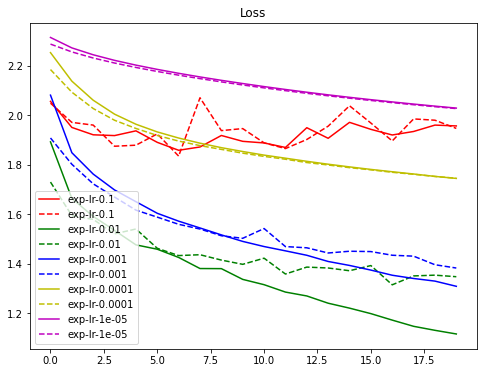

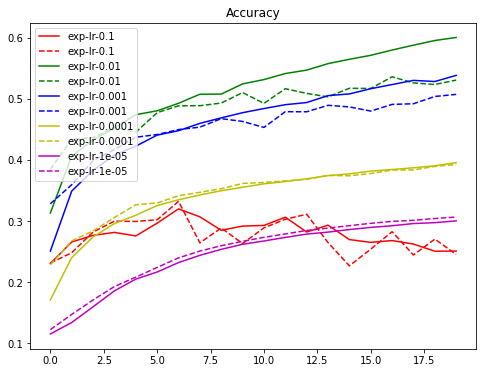

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [10]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.RMSprop(lr=lr, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
196/196 [==============================] - 3s 15ms/step - loss: 17303

Epoch 1/20
196/196 [==============================] - 3s 14ms/step - loss: 5.0506 - accuracy: 0.0985 - val_loss: 2.3040 - val_accuracy: 0.1000
Epoch 2/20
196/196 [==============================] - 3s 13ms/step - loss: 2.3033 - accuracy: 0.1010 - val_loss: 2.3026 - val_accuracy: 0.1003
Epoch 3/20
196/196 [==============================] - 3s 13ms/step - loss: 2.3030 - accuracy: 0.1003 - val_loss: 2.3018 - val_accuracy: 0.1004
Epoch 4/20
196/196 [==============================] - 3s 13ms/step - loss: 2.3033 - accuracy: 0.0988 - val_loss: 2.3029 - val_accuracy: 0.1001
Epoch 5/20
196/196 [==============================] - 3s 13ms/step - loss: 2.3031 - accuracy: 0.1008 - val_loss: 2.3033 - val_accuracy: 0.1001
Epoch 6/20
196/196 [==============================] - 3s 13ms/step - loss: 2.3033 - accuracy: 0.0974 - val_loss: 2.3024 - val_accuracy: 0.1002
Epoch 7/20
196/196 [==============================] - 3s 13ms/step - loss: 2.3032 - accuracy: 0.0987 - val_loss: 2.3039 - val_accuracy: 0.1003

196/196 [==============================] - 3s 13ms/step - loss: 1.6310 - accuracy: 0.4207 - val_loss: 1.5955 - val_accuracy: 0.4287
Epoch 4/20
196/196 [==============================] - 3s 13ms/step - loss: 1.5684 - accuracy: 0.4437 - val_loss: 1.5695 - val_accuracy: 0.4474
Epoch 5/20
196/196 [==============================] - 3s 13ms/step - loss: 1.5225 - accuracy: 0.4603 - val_loss: 1.5450 - val_accuracy: 0.4467
Epoch 6/20
196/196 [==============================] - 3s 13ms/step - loss: 1.4855 - accuracy: 0.4726 - val_loss: 1.5037 - val_accuracy: 0.4684
Epoch 7/20
196/196 [==============================] - 3s 13ms/step - loss: 1.4426 - accuracy: 0.4883 - val_loss: 1.4899 - val_accuracy: 0.4683
Epoch 8/20
196/196 [==============================] - 3s 14ms/step - loss: 1.4127 - accuracy: 0.4977 - val_loss: 1.4583 - val_accuracy: 0.4750
Epoch 9/20
196/196 [==============================] - 3s 13ms/step - loss: 1.3949 - accuracy: 0.5041 - val_loss: 1.4320 - val_accuracy: 0.4891
Epoch 10/2

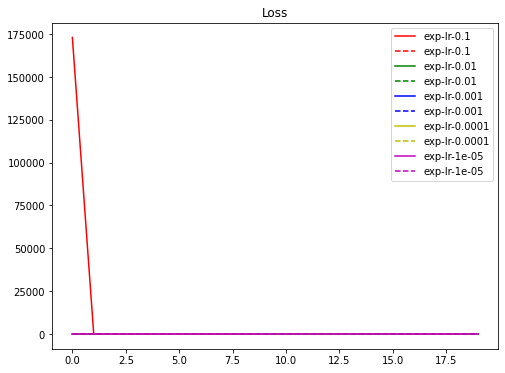

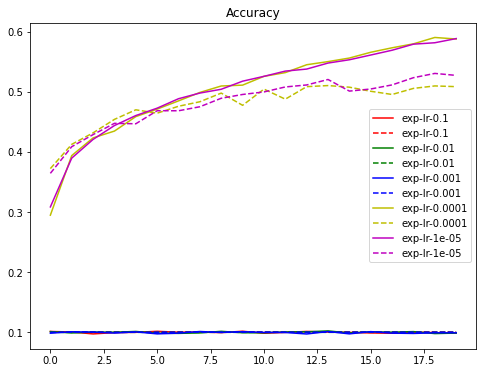

In [11]:
#import matplotlib.pyplot as plt
#%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [14]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.Adagrad(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
196/196 [==============================] - 3s 14ms/step - loss: 2.248

Epoch 1/20
196/196 [==============================] - 3s 13ms/step - loss: 2.1606 - accuracy: 0.2203 - val_loss: 2.0661 - val_accuracy: 0.2656
Epoch 2/20
196/196 [==============================] - 2s 12ms/step - loss: 2.0128 - accuracy: 0.2909 - val_loss: 1.9752 - val_accuracy: 0.3010
Epoch 3/20
196/196 [==============================] - 2s 12ms/step - loss: 1.9394 - accuracy: 0.3196 - val_loss: 1.9122 - val_accuracy: 0.3275
Epoch 4/20
196/196 [==============================] - 2s 12ms/step - loss: 1.8933 - accuracy: 0.3360 - val_loss: 1.8848 - val_accuracy: 0.3383
Epoch 5/20
196/196 [==============================] - 2s 12ms/step - loss: 1.8602 - accuracy: 0.3480 - val_loss: 1.8476 - val_accuracy: 0.3495
Epoch 6/20
196/196 [==============================] - 2s 12ms/step - loss: 1.8354 - accuracy: 0.3558 - val_loss: 1.8338 - val_accuracy: 0.3580
Epoch 7/20
196/196 [==============================] - 2s 12ms/step - loss: 1.8148 - accuracy: 0.3637 - val_loss: 1.8167 - val_accuracy: 0.3588

196/196 [==============================] - 2s 13ms/step - loss: 2.3196 - accuracy: 0.1206 - val_loss: 2.3196 - val_accuracy: 0.1249
Epoch 4/20
196/196 [==============================] - 2s 13ms/step - loss: 2.3137 - accuracy: 0.1242 - val_loss: 2.3140 - val_accuracy: 0.1266
Epoch 5/20
196/196 [==============================] - 2s 13ms/step - loss: 2.3084 - accuracy: 0.1274 - val_loss: 2.3090 - val_accuracy: 0.1279
Epoch 6/20
196/196 [==============================] - 2s 13ms/step - loss: 2.3037 - accuracy: 0.1306 - val_loss: 2.3044 - val_accuracy: 0.1292
Epoch 7/20
196/196 [==============================] - 2s 13ms/step - loss: 2.2994 - accuracy: 0.1326 - val_loss: 2.3002 - val_accuracy: 0.1314
Epoch 8/20
196/196 [==============================] - 2s 13ms/step - loss: 2.2953 - accuracy: 0.1344 - val_loss: 2.2962 - val_accuracy: 0.1336
Epoch 9/20
196/196 [==============================] - 2s 13ms/step - loss: 2.2915 - accuracy: 0.1358 - val_loss: 2.2925 - val_accuracy: 0.1359
Epoch 10/2

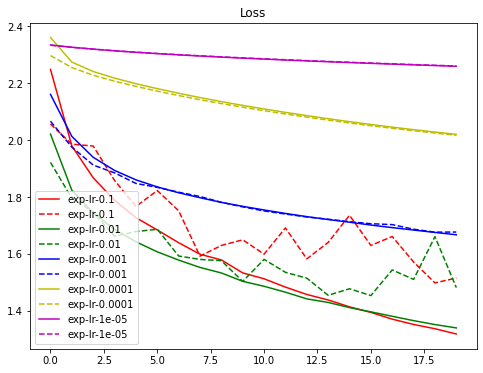

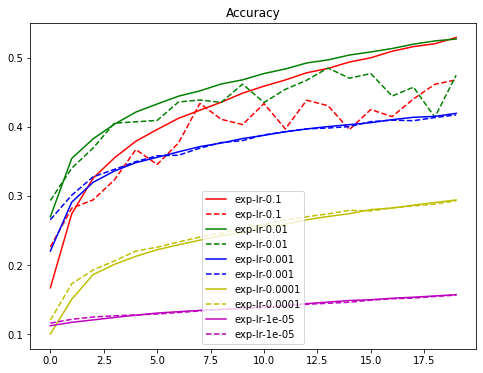

In [15]:
#import matplotlib.pyplot as plt
#%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [16]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.Adam(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
196/196 [==============================] - 3s 15ms/step - loss: 402.0

Epoch 1/20
196/196 [==============================] - 3s 14ms/step - loss: 1.9599 - accuracy: 0.2908 - val_loss: 1.7735 - val_accuracy: 0.3617
Epoch 2/20
196/196 [==============================] - 3s 13ms/step - loss: 1.7099 - accuracy: 0.3854 - val_loss: 1.6294 - val_accuracy: 0.4209
Epoch 3/20
196/196 [==============================] - 3s 14ms/step - loss: 1.6074 - accuracy: 0.4249 - val_loss: 1.6130 - val_accuracy: 0.4220
Epoch 4/20
196/196 [==============================] - 3s 13ms/step - loss: 1.5517 - accuracy: 0.4464 - val_loss: 1.5285 - val_accuracy: 0.4588
Epoch 5/20
196/196 [==============================] - 3s 13ms/step - loss: 1.5052 - accuracy: 0.4642 - val_loss: 1.4884 - val_accuracy: 0.4720
Epoch 6/20
196/196 [==============================] - 3s 13ms/step - loss: 1.4644 - accuracy: 0.4770 - val_loss: 1.4798 - val_accuracy: 0.4690
Epoch 7/20
196/196 [==============================] - 3s 13ms/step - loss: 1.4323 - accuracy: 0.4894 - val_loss: 1.4687 - val_accuracy: 0.4799

196/196 [==============================] - 3s 13ms/step - loss: 1.8707 - accuracy: 0.3486 - val_loss: 1.8399 - val_accuracy: 0.3594
Epoch 4/20
196/196 [==============================] - 3s 13ms/step - loss: 1.8181 - accuracy: 0.3684 - val_loss: 1.8040 - val_accuracy: 0.3738
Epoch 5/20
196/196 [==============================] - 3s 13ms/step - loss: 1.7803 - accuracy: 0.3828 - val_loss: 1.7647 - val_accuracy: 0.3875
Epoch 6/20
196/196 [==============================] - 3s 13ms/step - loss: 1.7502 - accuracy: 0.3932 - val_loss: 1.7436 - val_accuracy: 0.3886
Epoch 7/20
196/196 [==============================] - 3s 13ms/step - loss: 1.7248 - accuracy: 0.4024 - val_loss: 1.7165 - val_accuracy: 0.3993
Epoch 8/20
196/196 [==============================] - 3s 13ms/step - loss: 1.7028 - accuracy: 0.4090 - val_loss: 1.6984 - val_accuracy: 0.4065
Epoch 9/20
196/196 [==============================] - 3s 13ms/step - loss: 1.6832 - accuracy: 0.4173 - val_loss: 1.6843 - val_accuracy: 0.4070
Epoch 10/2

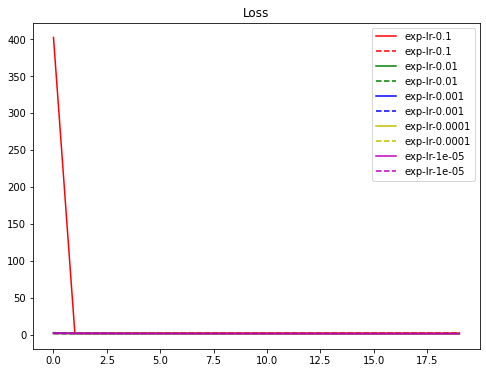

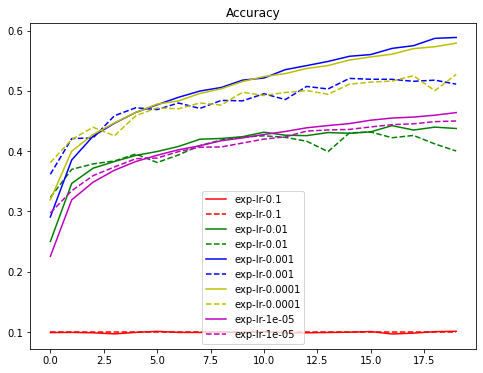

In [17]:
#import matplotlib.pyplot as plt
#%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()